# Second level analysis
The purpose of this ipynb is to plot contrasts from the Memory task
1. contrast 1: Encode > Retrieval (study > test)
2. contrast 2: Encode > Math
3. contrast 3: Retrieval > Math


In [1]:
import numpy as np
import pandas as pd
import os, glob, re
from os.path import join
from pathlib import Path
import nilearn
import argparse
from nilearn import image, plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import threshold_stats_img
import matplotlib.pyplot as plt
from scipy.stats import norm
from nilearn.glm import cluster_level_inference
from nilearn import plotting
from nilearn.glm.second_level import SecondLevelModel


## parameters

In [2]:
# parameters
main_dir ='/Volumes/spacetop_projects_fractional/'
# con_dir = '/dartfs-hpc/rc/lab/C/CANlab/labdata/projects/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-tomsaxe/sub-0066'
task_name = 'task-memory'
con_dir = join(main_dir, 'analysis', 'fmri', 'nilearn', 'glm', task_name)


## Contrast01: Encode > Retrieval

total number of images: 45
filenames: ['sub-0003', 'sub-0004', 'sub-0005', 'sub-0010', 'sub-0011', 'sub-0013', 'sub-0016', 'sub-0018', 'sub-0021', 'sub-0025', 'sub-0026', 'sub-0029', 'sub-0031', 'sub-0033', 'sub-0036', 'sub-0039', 'sub-0040', 'sub-0044', 'sub-0052', 'sub-0056', 'sub-0057', 'sub-0058', 'sub-0061', 'sub-0062', 'sub-0069', 'sub-0076', 'sub-0077', 'sub-0080', 'sub-0083', 'sub-0084', 'sub-0088', 'sub-0090', 'sub-0092', 'sub-0093', 'sub-0094', 'sub-0098', 'sub-0101', 'sub-0103', 'sub-0111', 'sub-0112', 'sub-0116', 'sub-0124', 'sub-0129', 'sub-0130', 'sub-0133']


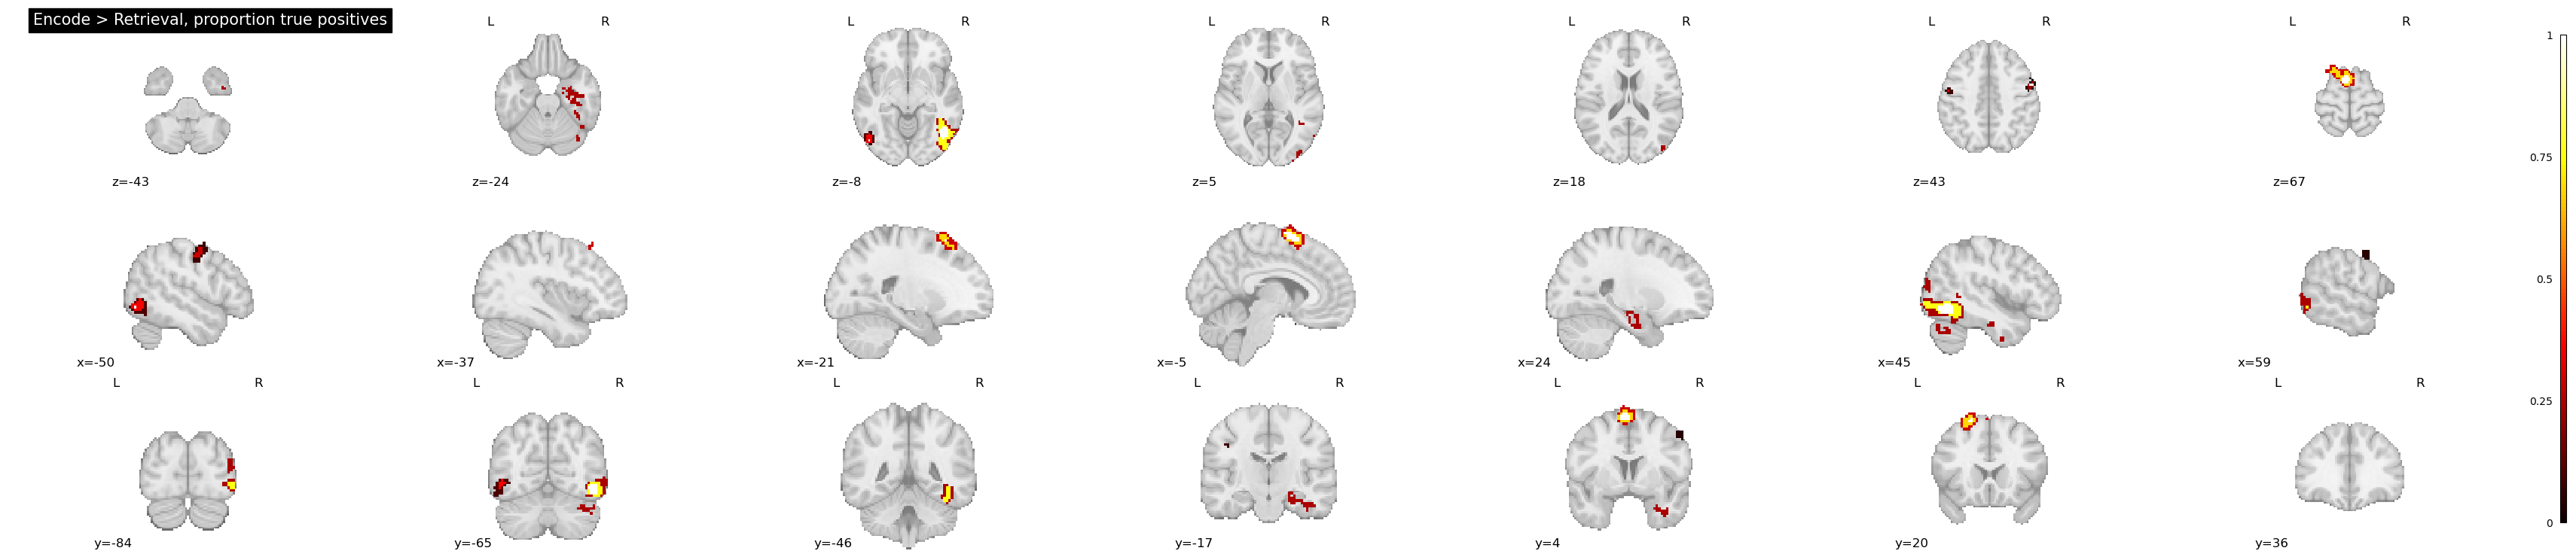

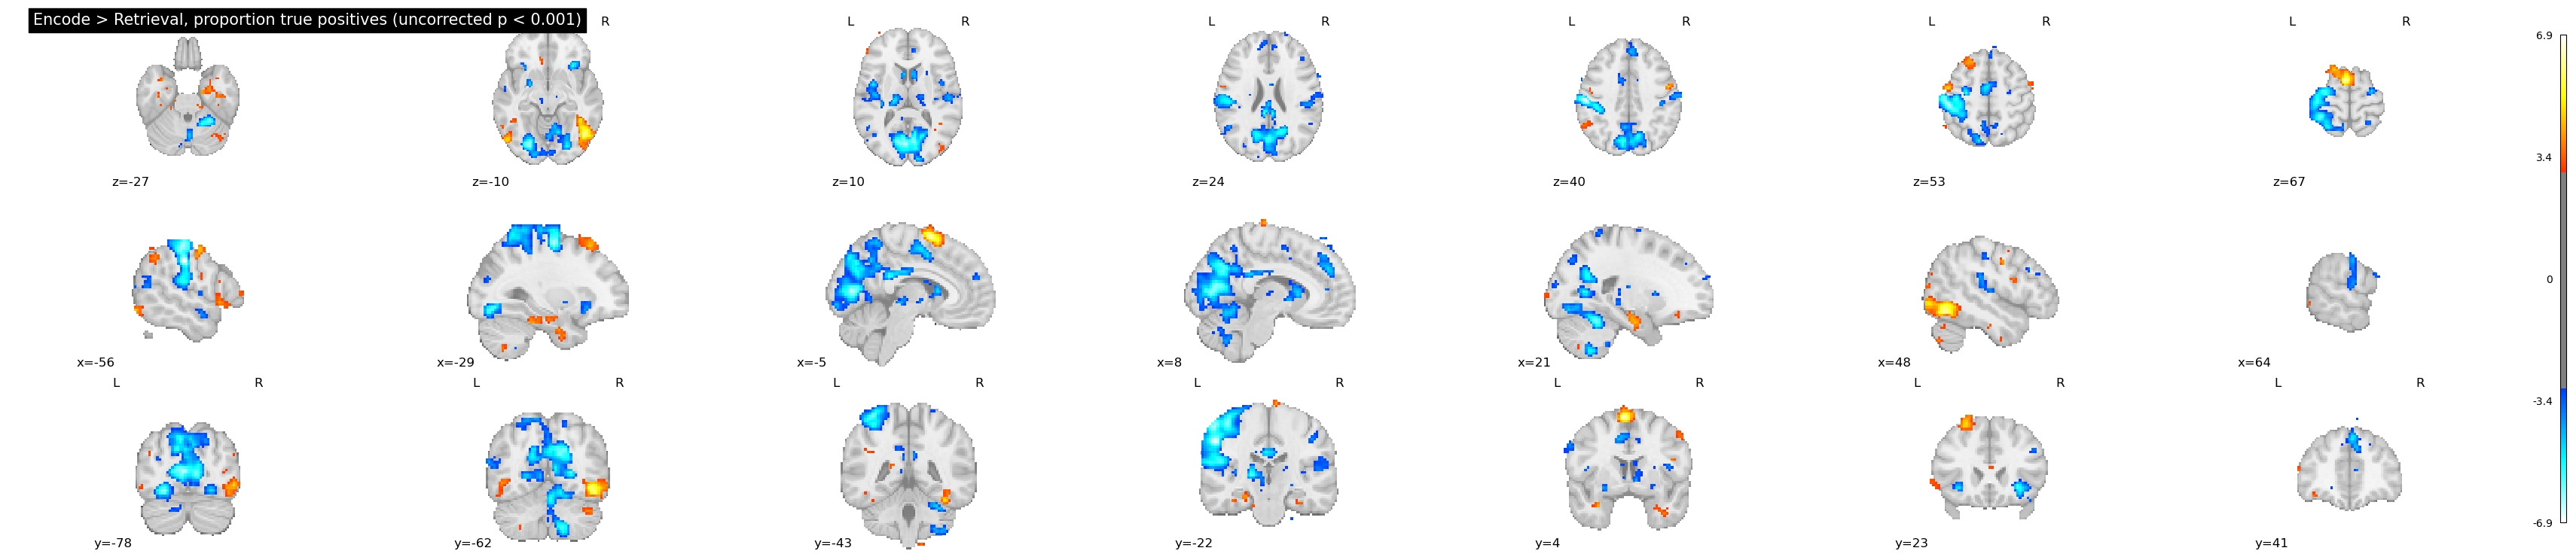

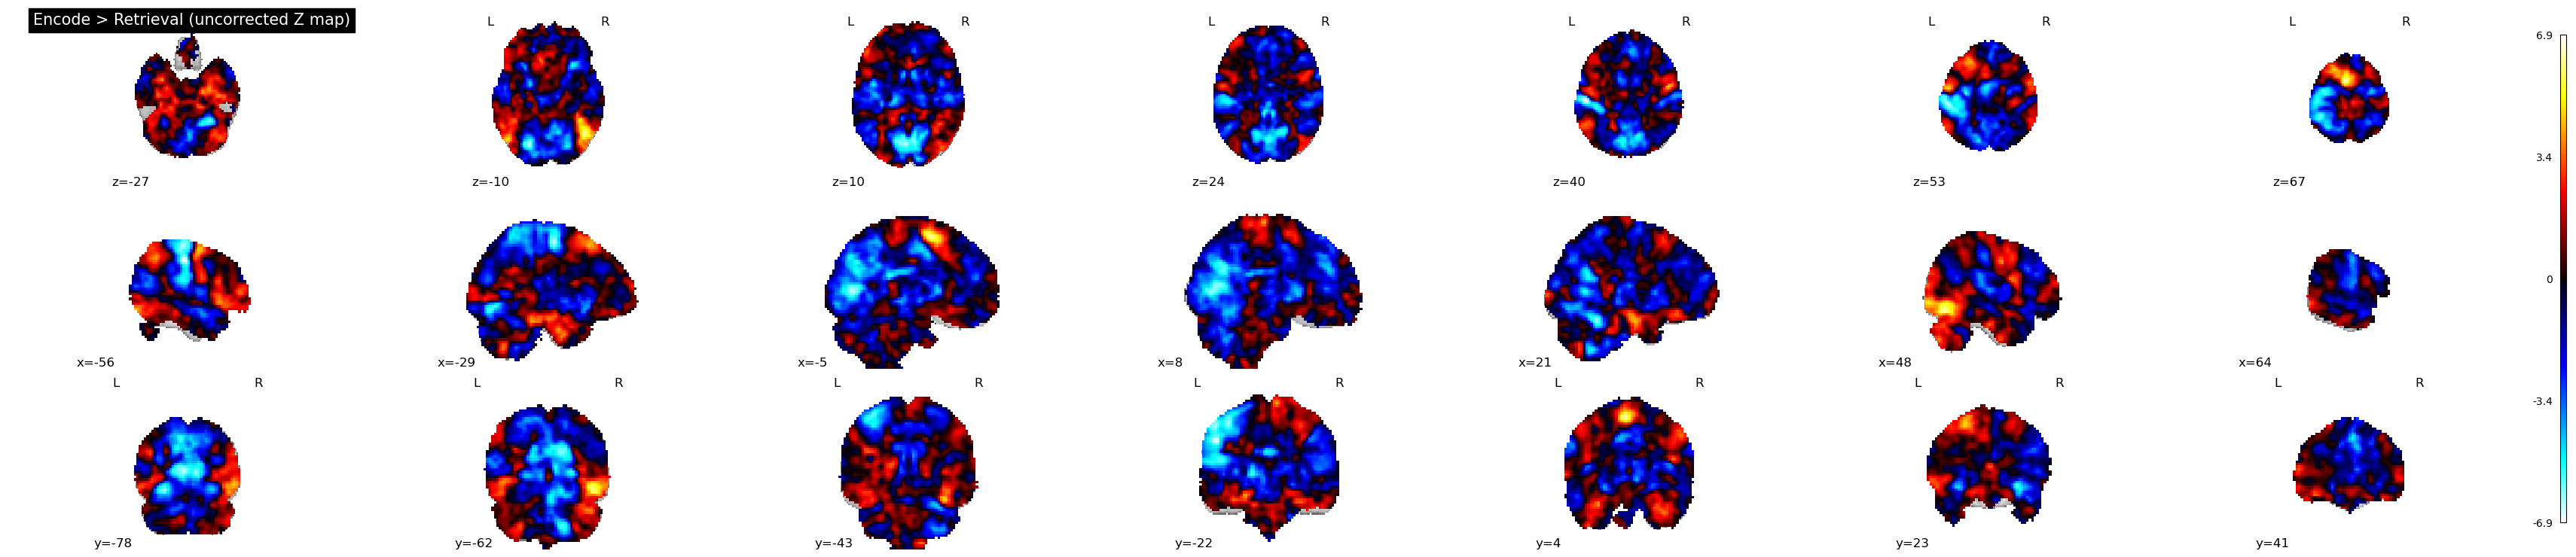

In [14]:
# load images
beta01_template = f'*_ses-04_{task_name}_run*_con-01_desc-encodeGTretrieval_stat-betamap.nii.gz'
second_level_input  = sorted(glob.glob(join(con_dir, '**', beta01_template), recursive = True))

# print metadata
pattern = r'sub-(\d{4})'
sub_ids = []
for filename in second_level_input:
    match = re.search(pattern, filename)
    if match:
        sub_id = match.group(1)
        sub_ids.append(f"sub-{sub_id}")

print(f"total number of images: {len(second_level_input)}")
print(f"filenames: {sub_ids}")

design_matrix = pd.DataFrame(
    [1] * len(second_level_input), columns=["intercept"]
)

second_level_model = SecondLevelModel(smoothing_fwhm=6.0)
second_level_model = second_level_model.fit(
    second_level_input, design_matrix=design_matrix
)

z_map = second_level_model.compute_contrast(output_type="z_score")


p_val = 0.001
p001_uncorrected = norm.isf(p_val)

proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=0.05
)

plotting.plot_stat_map(
    proportion_true_discoveries_img,
    threshold=0.0,
    display_mode="mosaic",
    vmax=1,
    colorbar=True,
    title="Encode > Retrieval, proportion true positives",
)

plotting.plot_stat_map(
    z_map,
    threshold=p001_uncorrected,
    colorbar=True,
    display_mode="mosaic",
    title="Encode > Retrieval, proportion true positives (uncorrected p < 0.001)",
)

plotting.show()
zmap = plotting.plot_stat_map(
    z_map,
    threshold=0.0,
    colorbar=True,
    display_mode="mosaic",
    title="Encode > Retrieval (uncorrected Z map)",
)
z_map.to_filename('second-level_task-memory_con-01_desc-encodeGTretrieval_stat-betamap.nii.gz')

## Contrast02: Encode > Math

total number of images: 45
filenames: ['sub-0003', 'sub-0004', 'sub-0005', 'sub-0010', 'sub-0011', 'sub-0013', 'sub-0016', 'sub-0018', 'sub-0021', 'sub-0025', 'sub-0026', 'sub-0029', 'sub-0031', 'sub-0033', 'sub-0036', 'sub-0039', 'sub-0040', 'sub-0044', 'sub-0052', 'sub-0056', 'sub-0057', 'sub-0058', 'sub-0061', 'sub-0062', 'sub-0069', 'sub-0076', 'sub-0077', 'sub-0080', 'sub-0083', 'sub-0084', 'sub-0088', 'sub-0090', 'sub-0092', 'sub-0093', 'sub-0094', 'sub-0098', 'sub-0101', 'sub-0103', 'sub-0111', 'sub-0112', 'sub-0116', 'sub-0124', 'sub-0129', 'sub-0130', 'sub-0133']


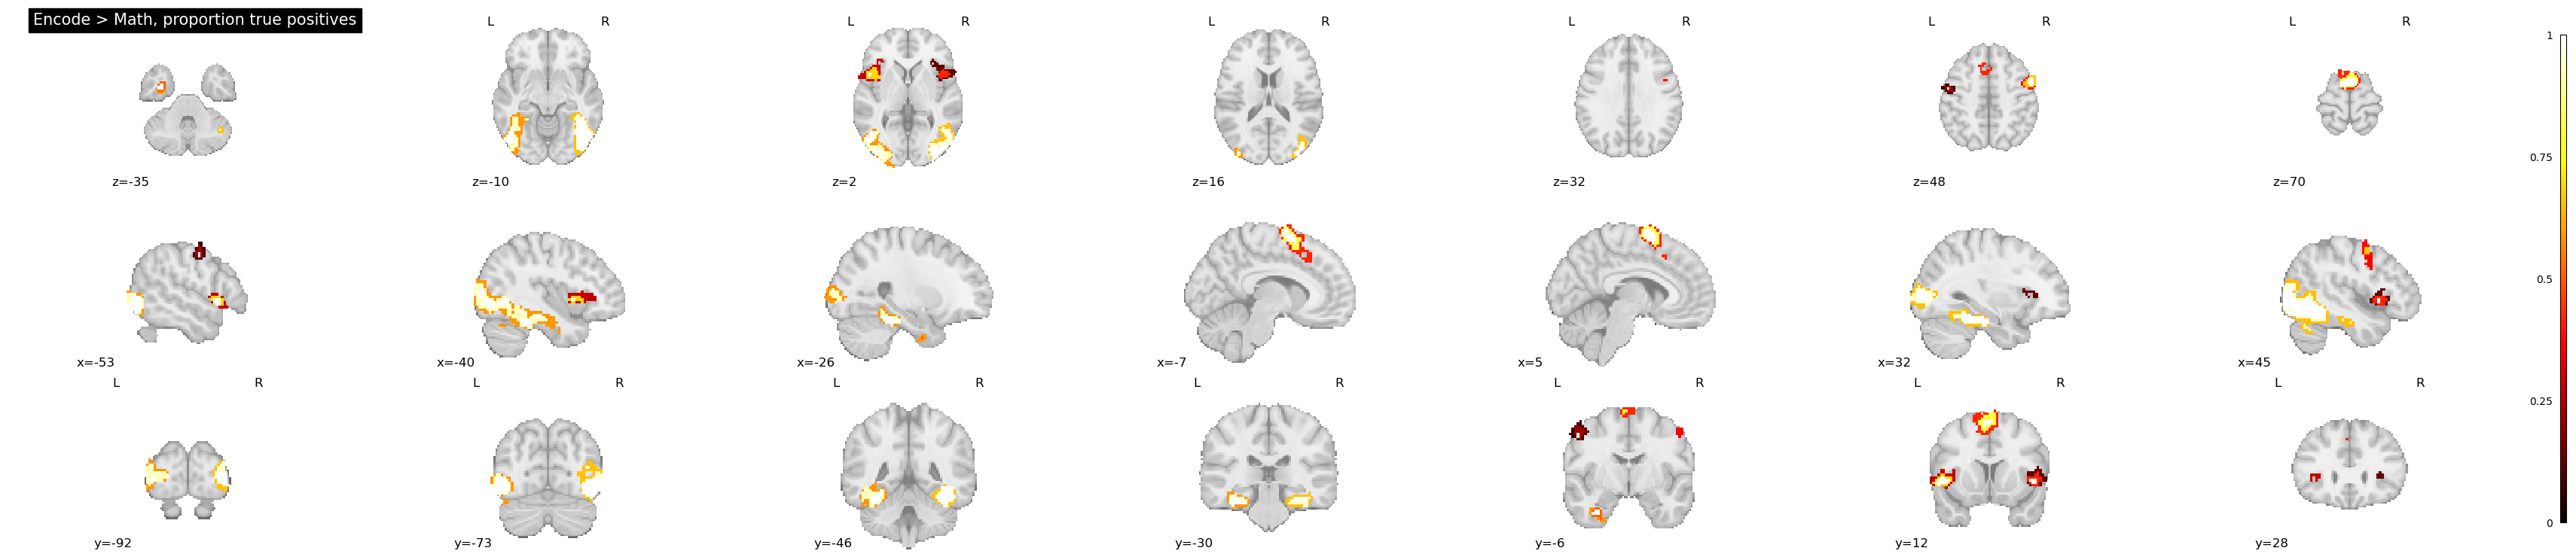

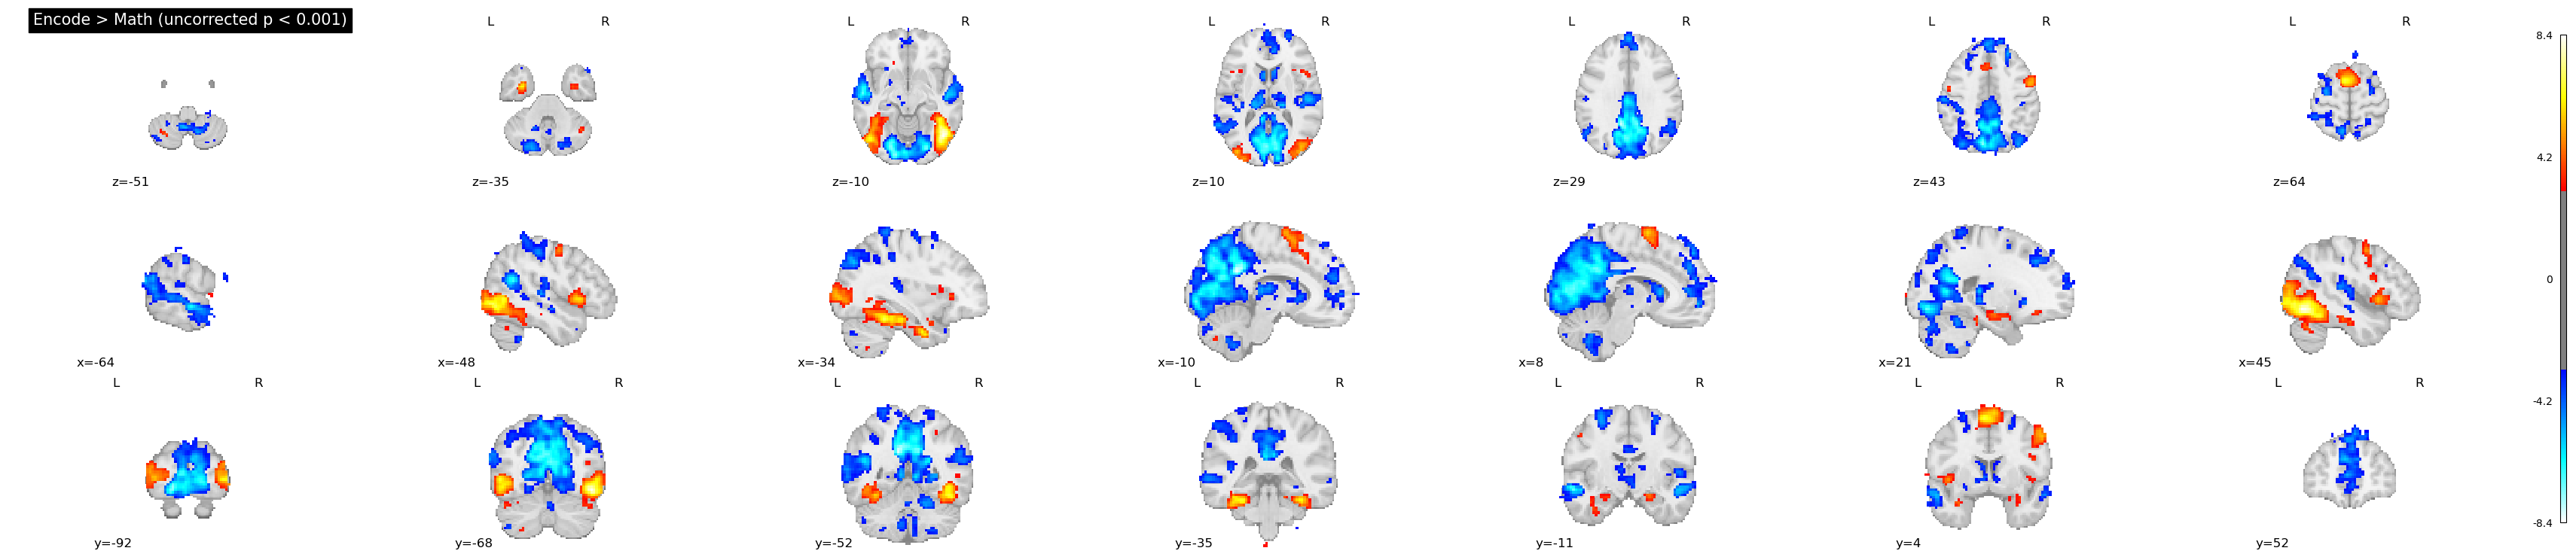

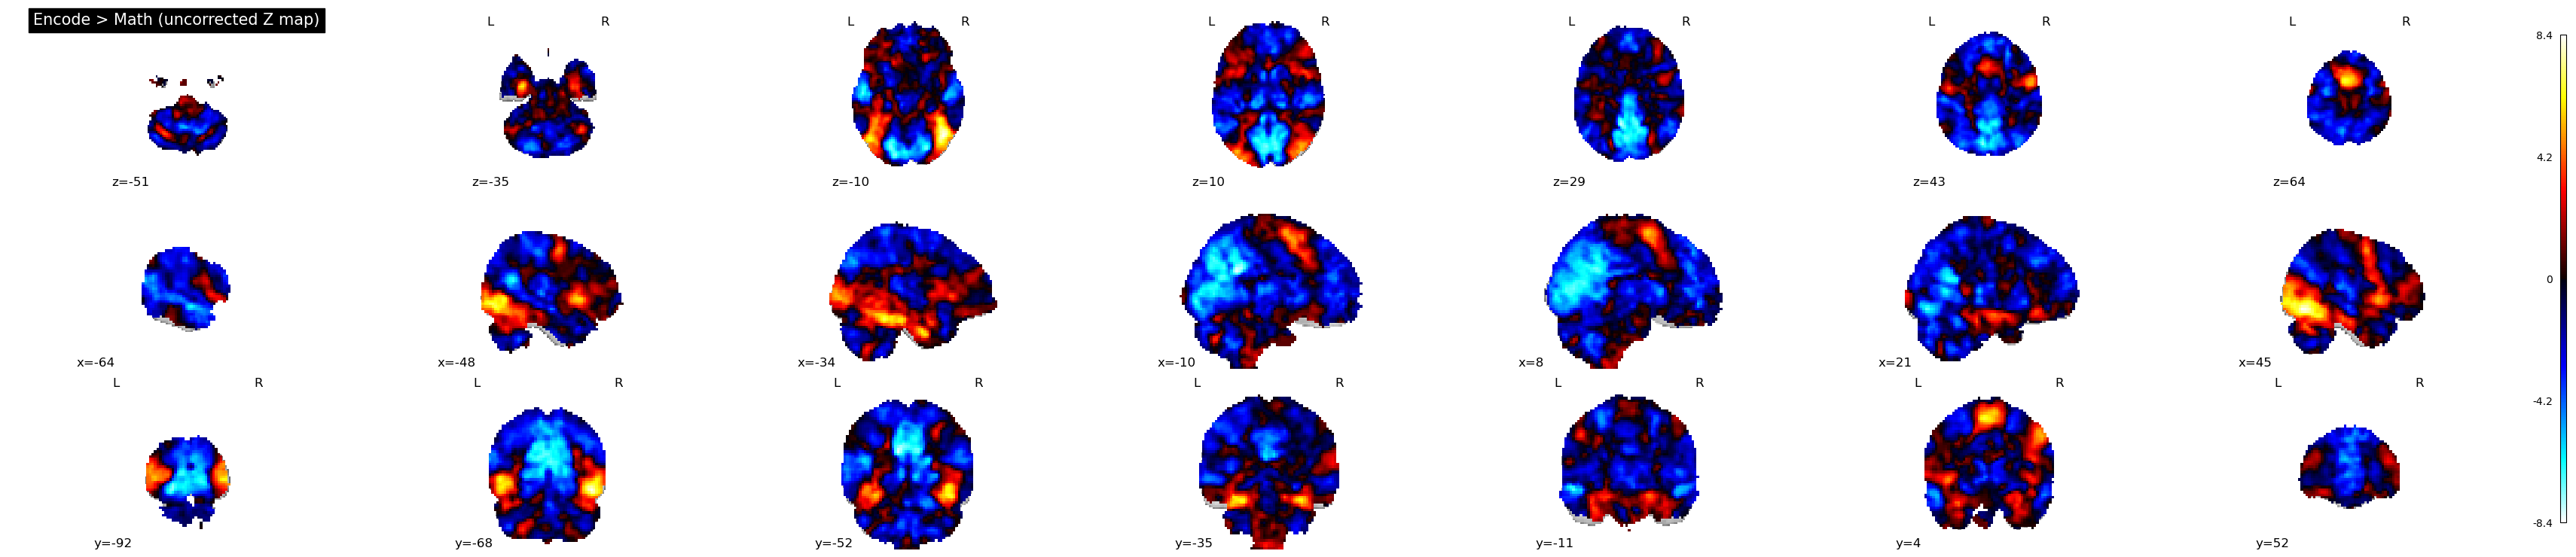

In [17]:
#   -> load images
main_dir ='/Volumes/spacetop_projects_fractional/'
con_dir = join(main_dir, 'analysis', 'fmri', 'nilearn', 'glm', task_name)
beta02_template = f'*_ses-04_{task_name}_run*_con-02_desc-encodeGTmath_stat-betamap.nii.gz'
second_level_input  = sorted(glob.glob(join(con_dir, '**', beta02_template), recursive = True))

#   -> print metadata
pattern = r'sub-(\d{4})'
sub_ids = []
for filename in second_level_input:
    match = re.search(pattern, filename)
    if match:
        sub_id = match.group(1)
        sub_ids.append(f"sub-{sub_id}")

print(f"total number of images: {len(second_level_input)}")
print(f"filenames: {sub_ids}")

design_matrix = pd.DataFrame(
    [1] * len(second_level_input), columns=["intercept"]
)


#   -> second level estimation
second_level_model = SecondLevelModel(smoothing_fwhm=6.0)
second_level_model = second_level_model.fit(
    second_level_input, design_matrix=design_matrix
)

#   -> z map from contrasts
z_map = second_level_model.compute_contrast(output_type="z_score")

p_val = 0.001
p001_uncorrected = norm.isf(p_val)


proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=0.05
)

#   -> plot stat maps
plotting.plot_stat_map(
    proportion_true_discoveries_img,
    threshold=0.0,
    display_mode="mosaic",
    vmax=1,
    colorbar=True,
    title="Encode > Math, proportion true positives",
)

plotting.plot_stat_map(
    z_map,
    threshold=p001_uncorrected,
    colorbar=True,
    display_mode="mosaic",
    title="Encode > Math (uncorrected p < 0.001)",
)

plotting.show()

zmap = plotting.plot_stat_map(
    z_map,
    threshold=0.0,
    colorbar=True,
    display_mode="mosaic",
    title="Encode > Math (uncorrected Z map)",
)
z_map.to_filename('second-level_task-memory_con-02_desc-encodeGTmath_stat-betamap.nii.gz')

## Contrast03: Retrieval > Math

total number of images: 45
filenames: ['sub-0003', 'sub-0004', 'sub-0005', 'sub-0010', 'sub-0011', 'sub-0013', 'sub-0016', 'sub-0018', 'sub-0021', 'sub-0025', 'sub-0026', 'sub-0029', 'sub-0031', 'sub-0033', 'sub-0036', 'sub-0039', 'sub-0040', 'sub-0044', 'sub-0052', 'sub-0056', 'sub-0057', 'sub-0058', 'sub-0061', 'sub-0062', 'sub-0069', 'sub-0076', 'sub-0077', 'sub-0080', 'sub-0083', 'sub-0084', 'sub-0088', 'sub-0090', 'sub-0092', 'sub-0093', 'sub-0094', 'sub-0098', 'sub-0101', 'sub-0103', 'sub-0111', 'sub-0112', 'sub-0116', 'sub-0124', 'sub-0129', 'sub-0130', 'sub-0133']


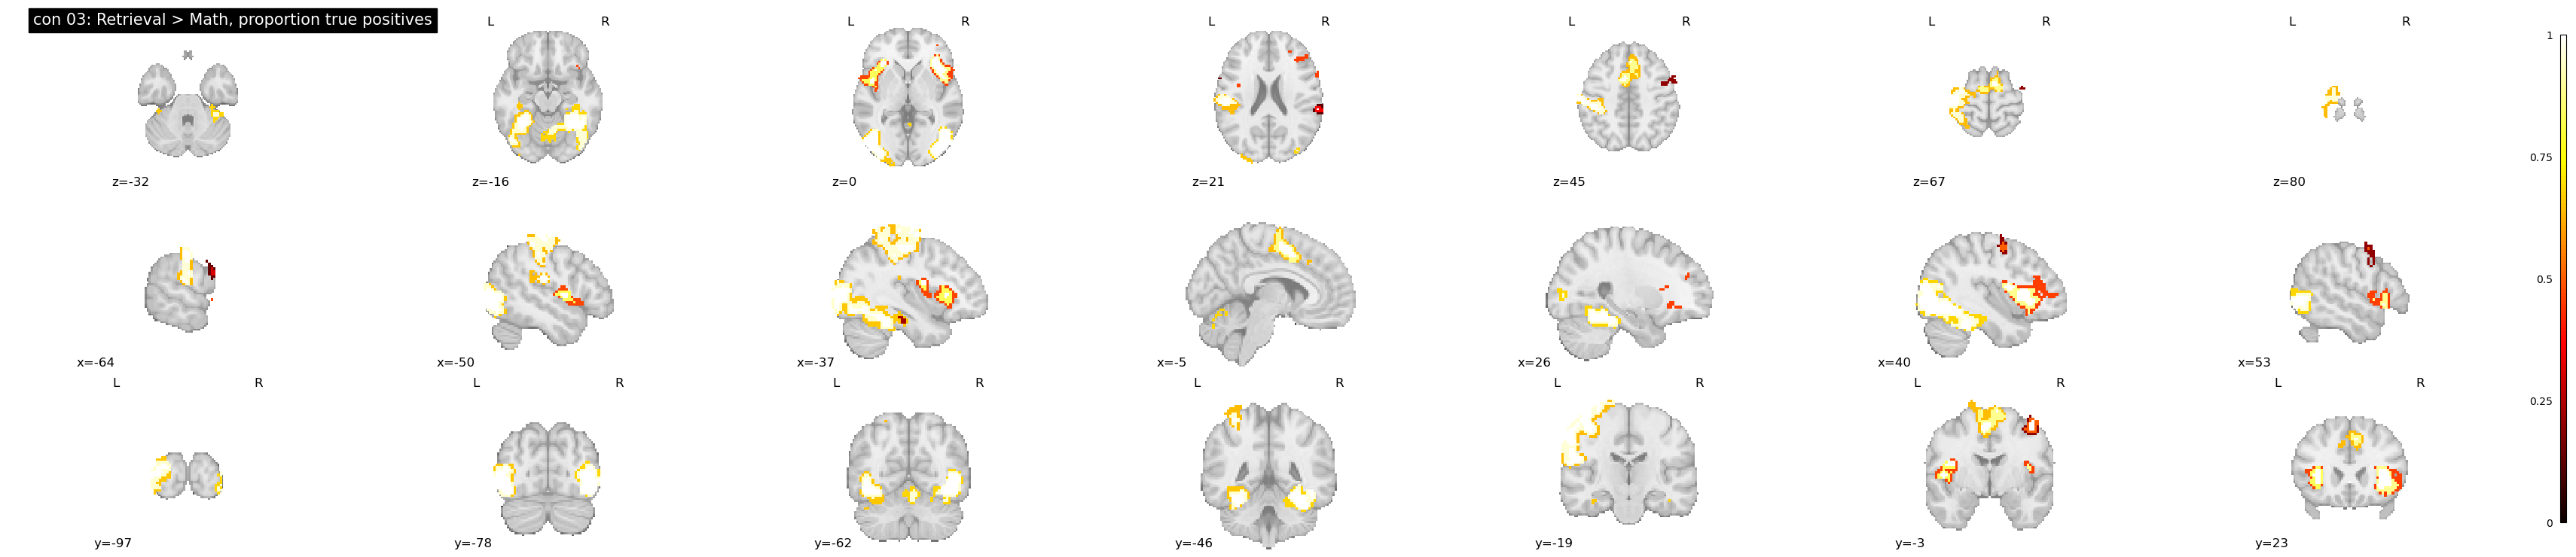

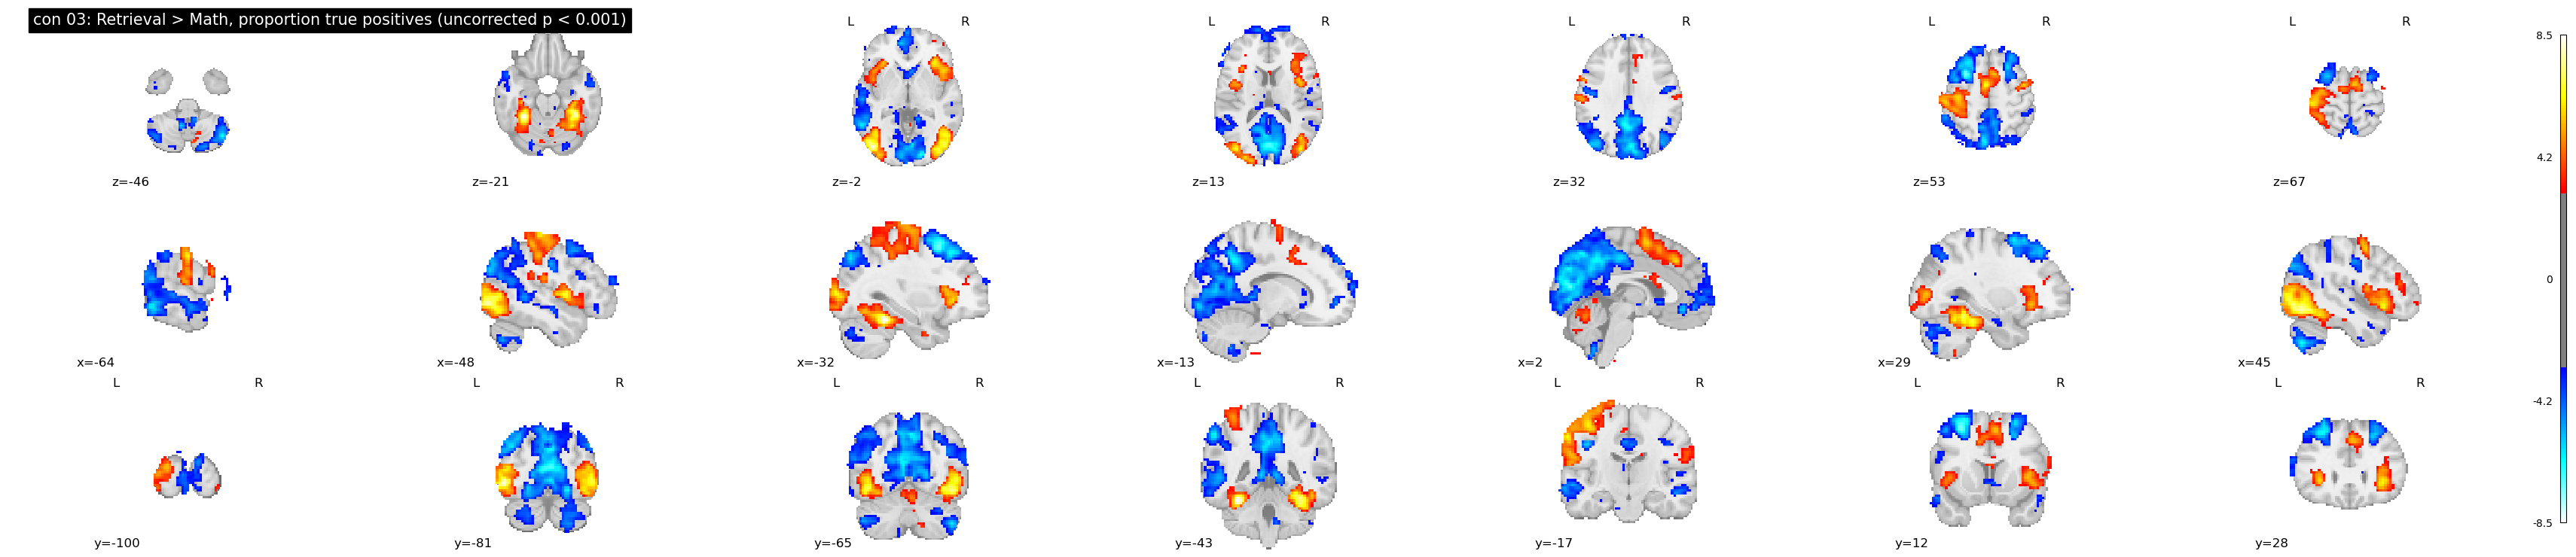

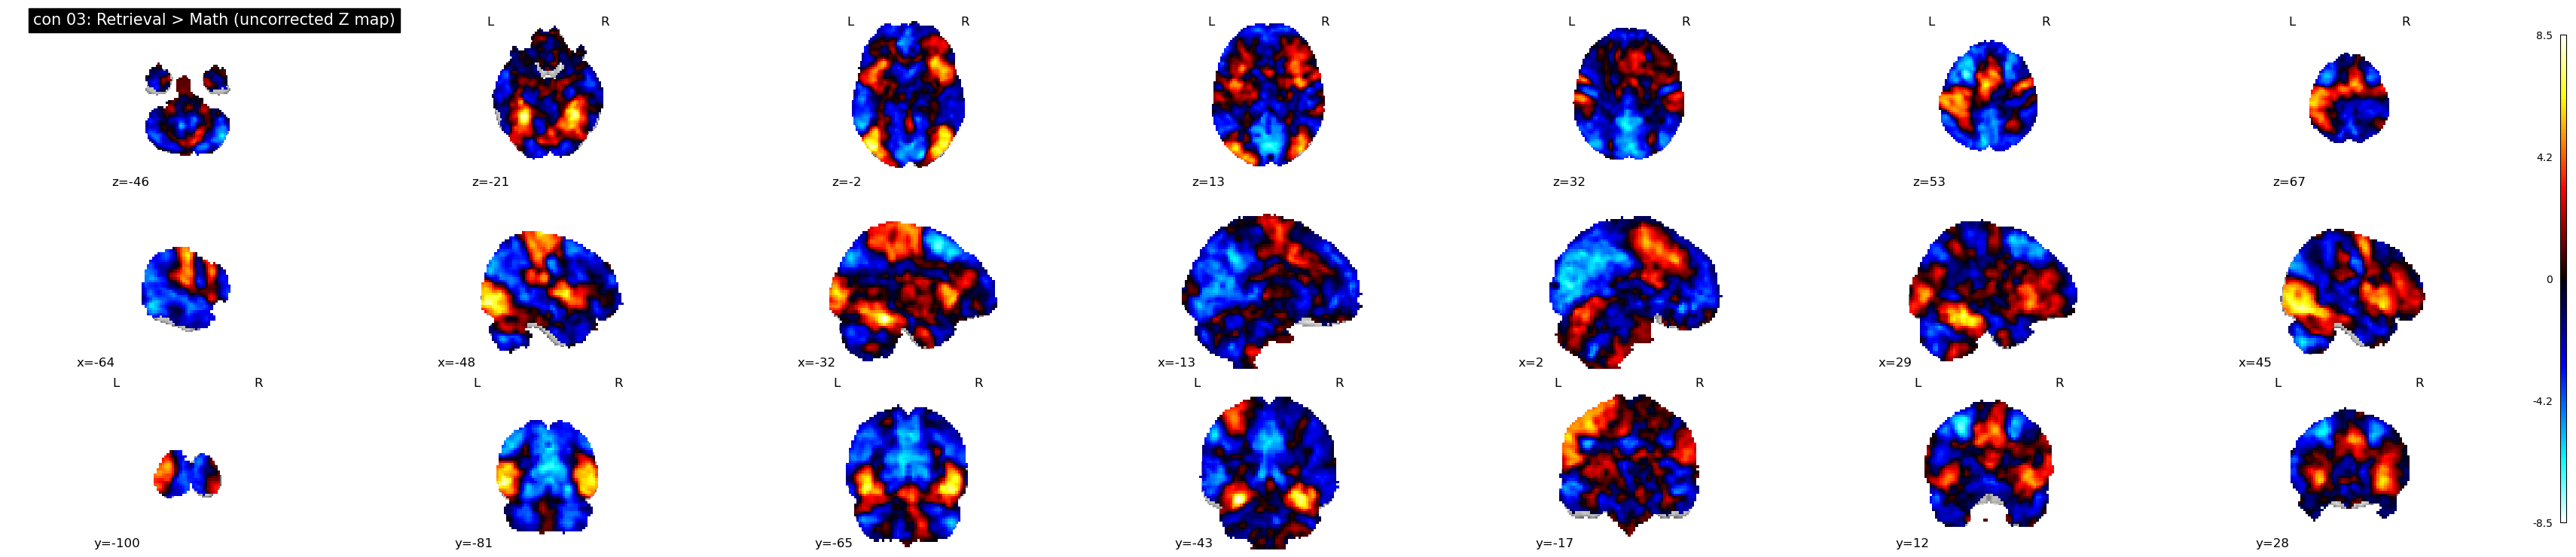

In [18]:
#   -> load images
beta01_template = f'*_ses-04_{task_name}_run*_con-03_desc-retrievalGTmath_stat-betamap.nii.gz'
second_level_input  = sorted(glob.glob(join(con_dir, '**', beta01_template), recursive = True))

#   -> print metadata
pattern = r'sub-(\d{4})'
sub_ids = []
for filename in second_level_input:
    match = re.search(pattern, filename)
    if match:
        sub_id = match.group(1)
        sub_ids.append(f"sub-{sub_id}")
print(f"total number of images: {len(second_level_input)}")
print(f"filenames: {sub_ids}")

design_matrix = pd.DataFrame(
    [1] * len(second_level_input), columns=["intercept"]
)

#   -> second level estimation
second_level_model = SecondLevelModel(smoothing_fwhm=6.0)
second_level_model = second_level_model.fit(
    second_level_input, design_matrix=design_matrix
)

#   -> z map from contrasts
z_map = second_level_model.compute_contrast(output_type="z_score")
p_val = 0.001
p001_uncorrected = norm.isf(p_val)
proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=0.05
)

#   -> plot stat maps
plotting.plot_stat_map(
    proportion_true_discoveries_img,
    threshold=0.0,
    display_mode="mosaic",
    vmax=1,
    colorbar=True,
    title="con 03: Retrieval > Math, proportion true positives",
)

plotting.plot_stat_map(
    z_map,
    threshold=p001_uncorrected,
    colorbar=True,
    display_mode="mosaic",
    title="con 03: Retrieval > Math, proportion true positives (uncorrected p < 0.001)",
)

plotting.show()

zmap = plotting.plot_stat_map(
    z_map,
    threshold=0.0,
    colorbar=True,
    display_mode="mosaic",
    title="con 03: Retrieval > Math (uncorrected Z map)",
)
z_map.to_filename('second-level_task-memory_con-03_desc-retrievalGTmath_stat-betamap.nii.gz')